# 3.2 Transfer learning #

## Data

In this task, we will be transferring the learning from assignment 3.1 on the Kuzushiji-MNIST to the Kuzushiji-49 (Clanuwat et al., 2018) dataset.

Kuzushiji-49 contains 270,912 images spanning 49 classes, and is an extension of the Kuzushiji-MNIST dataset.

### Loading the Data
Since the data is provided in a Python NumPy format, we will be using the NPZ package (https://github.com/fhs/NPZ.jl) to load in the data.

In [90]:
# Define the path to the data directory, relative to the notebook
DATA_PATH = "data/"

"data/"

In [91]:
using Pkg
Pkg.add("NPZ")

# Load the data (this may take a few minutes)
using NPZ

train_x = npzread("$DATA_PATH/k49-train-imgs.npz")["arr_0"];
train_y = npzread("$DATA_PATH/k49-train-labels.npz")["arr_0"];
test_x = npzread("$DATA_PATH/k49-test-imgs.npz")["arr_0"];
test_y = npzread("$DATA_PATH/k49-test-labels.npz")["arr_0"];

# These arrays have the sample number dimension 1
# The original KMINST data has the sample number in the last dimension
# They are also tranposed in the (28 x 28) image pixel representation
# We permute x array dimensions for consistency with the previous setup
train_x = permutedims(train_x, (3, 2, 1));
test_x = permutedims(test_x, (3, 2, 1));

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


### A Brief Look at the Data
Let's have a look at some of the images in the dataset. We plot 3 samples of the first 8 classes (note that there are 49 now) to get a good grasp of what the images look like.

In [92]:
# First, let's extract the indices of the samples we want to plot
num_classes = 8
num_per_class = 3

indices_to_plot = Dict{Int,Array{Int}}()
for key in 0:49  # The labels take values in the range [0, 49] both inclusive
    cur_indices = []
    for (i, class) in enumerate(train_y)
        if key == class
            push!(cur_indices, i)
        end
        
        # Break out of the loop if we have found enough samples
        if length(cur_indices) >= num_per_class
            break
        end
    end
    indices_to_plot[key] = cur_indices  # Store the indices in the Dict
end

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


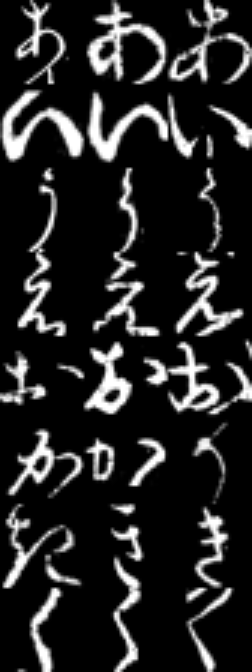

In [93]:
using Pkg
Pkg.add("Images")
Pkg.add("ImageMagick")

using Images

data = zeros(UInt8, 28*num_classes, 28*num_per_class)
for label in 0:num_classes - 1
    for col in 1:num_per_class
        sample = train_x[:, :, indices_to_plot[label][col]]
        data[28label+1:28(label + 1), 28(col-1)+1:28col] = sample'
    end
end

img = Gray.(data./255)
imresize(img, 3 .* size(img))

## Tasks

### Task 1: Evaluate your Pre-Trained CNN on Kuzushiji-49 (10%)

How well does the network from task 3.1 work on the new target dataset?

In [94]:
# Your code for Task 1 goes here

### Task 2: Transfer Learning (50%)

Adapt the model from task 3.1 to the target dataset.

In [95]:
# Your code for Task 2 goes here

### Task 3: Evaluation after Transfer Learning (20%)

How does the model do now? Evaluate performance in terms of accuracy on the test set.

In [96]:
# Your code for Task 3 goes here

### Task 4: Report (20%)

You are expected to write a short (less than 400 words in total) report on:
1. Model decisions and tuning - what changes did you make architecturally to the model?
1. Comparison of results
1. Suggestions for Future Work